# Import

In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Charger les données à partir d'un fichier CSV
data = pd.read_csv('billets.csv', delimiter=';')

# Etude fichier

In [163]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [198]:
mean_margin_low = data['margin_low'].mean()
data['margin_low'].fillna(mean_margin_low, inplace=True)

In [199]:
data.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [165]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [166]:
data.shape

(1500, 7)

In [200]:
# Enlever les espaces dans les données
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].str.strip()

# Analyse descriptive

True     1000
False     500
Name: is_genuine, dtype: int64



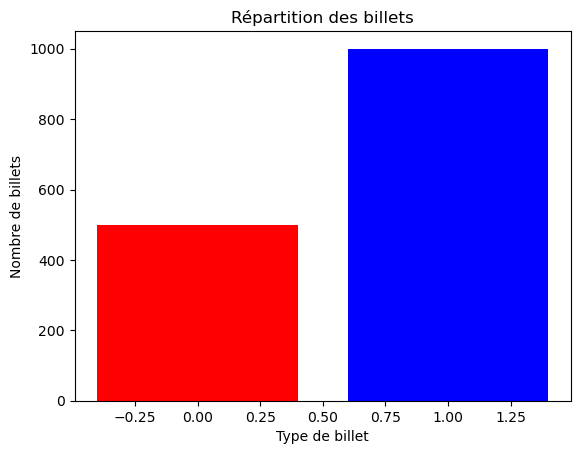

In [168]:
#Nombre de vrais/faux billets :
count = data['is_genuine'].value_counts()
print(count)
print()

# Créer un graphique à barres avec des couleurs différentes pour les billets faux
plt.bar(count.index, count.values, color=['blue', 'red'])

# Ajouter des étiquettes d'axe et de titre
plt.xlabel('Type de billet')
plt.ylabel('Nombre de billets')
plt.title('Répartition des billets')

# Modifier la couleur de la barre correspondant aux billets faux
plt.bar(count.index[1], count.values[1], color='red')

# Afficher le graphique
plt.show()


In [169]:
# Statistiques descriptives
stats = data.drop('is_genuine', axis=1).describe().round(3)
print(stats)

       diagonal  height_left  height_right  margin_low  margin_up    length
count  1500.000     1500.000      1500.000    1500.000   1500.000  1500.000
mean    171.958      104.030       103.920       4.486      3.151   112.679
std       0.305        0.299         0.326       0.656      0.232     0.873
min     171.040      103.140       102.820       2.980      2.270   109.490
25%     171.750      103.820       103.710       4.030      2.990   112.030
50%     171.960      104.040       103.920       4.330      3.140   112.960
75%     172.170      104.230       104.150       4.860      3.310   113.340
max     173.010      104.880       104.950       6.900      3.910   114.440


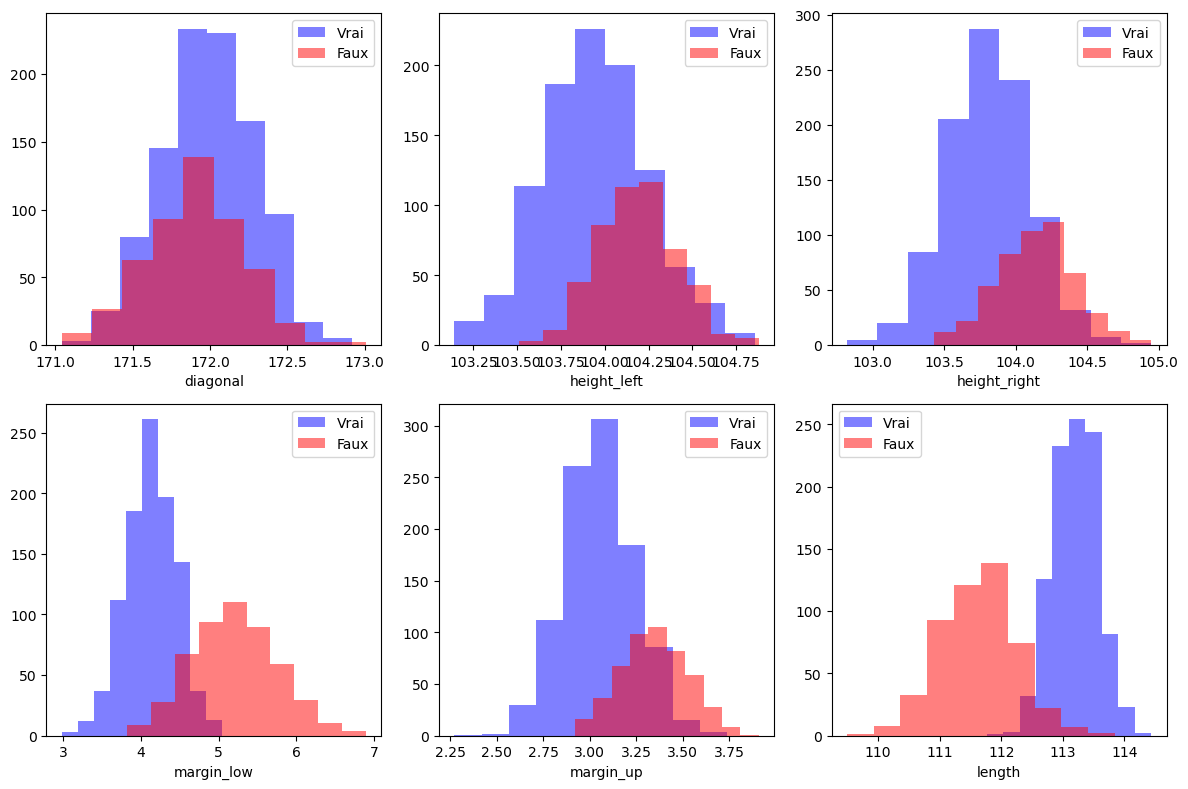

In [170]:
# Sélectionner les colonnes de dimensions
dimensions = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
dimensions_data = data[dimensions]

# Créer un subplot de 2x3 pour les histogrammes des dimensions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Parcourir les dimensions et créer les histogrammes correspondants
for i, dim in enumerate(dimensions):
    ax = axes[i // 3, i % 3]

    # Séparer les données en fonction de la valeur de la colonne "is_genuine"
    genuine_data = dimensions_data[data['is_genuine']]
    fake_data = dimensions_data[~data['is_genuine']]

    # Tracer les histogrammes pour les vrais billets en bleu et les faux billets en rouge
    ax.hist(genuine_data[dim], bins=10, color='blue', alpha=0.5, label='Vrai')
    ax.hist(fake_data[dim], bins=10, color='red', alpha=0.5, label='Faux')

    ax.set_xlabel(dim)
    ax.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


# Modèle de régression

In [201]:
# Séparer les caractéristiques (X) de la variable cible (y)
X = data.drop('is_genuine', axis=1)
y = data['is_genuine']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [172]:
# Calculer le rappel
recall = recall_score(y_test, y_pred)
print("Rappel : {:.2f}".format(recall))
print("Le rappel mesure la capacité du modèle à identifier correctement les vrais positifs parmi tous les exemples positifs réels. \n Un rappel de 1.00 indique que le modèle a identifié tous les exemples positifs correctement.")
print()

# Calculer la précision
precision = precision_score(y_test, y_pred)
print("Précision : {:.2f}".format(precision))
print("La précision mesure la proportion d'exemples positifs prédits correctement parmi tous les exemples positifs prédits. \n Une précision de 0.98 indique que le modèle a une grande précision dans ses prédictions positives.")
print()

# Calculer la F-mesure
f1 = f1_score(y_test, y_pred)
print("F-mesure : {:.2f}".format(f1))
print("La F-mesure combine à la fois la précision et le rappel en une seule métrique. \n Une F-mesure de 0.99 indique un équilibre entre la précision et le rappel du modèle.")
print()

# Calculer la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(confusion)
print("La matrice de confusion permet de visualiser les performances du modèle en termes de vrais positifs, faux positifs, vrais négatifs et faux négatifs. \n Dans ce cas, le modèle a prédit 107 vrais négatifs, 3 faux positifs, 0 faux négatifs et 190 vrais positifs.")
print()

# Calculer la courbe ROC et l'aire sous la courbe ROC (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Aire sous la courbe ROC (AUC) : {:.2f}".format(auc))
print("L'aire sous la courbe ROC (AUC) mesure la capacité du modèle à distinguer les classes positives et négatives en fonction du seuil de classification. \n Une AUC de 0.99 indique que le modèle a une très bonne capacité de discrimination.")


Rappel : 1.00
Le rappel mesure la capacité du modèle à identifier correctement les vrais positifs parmi tous les exemples positifs réels. 
 Un rappel de 1.00 indique que le modèle a identifié tous les exemples positifs correctement.

Précision : 0.98
La précision mesure la proportion d'exemples positifs prédits correctement parmi tous les exemples positifs prédits. 
 Une précision de 0.98 indique que le modèle a une grande précision dans ses prédictions positives.

F-mesure : 0.99
La F-mesure combine à la fois la précision et le rappel en une seule métrique. 
 Une F-mesure de 0.99 indique un équilibre entre la précision et le rappel du modèle.

Matrice de confusion :
[[107   3]
 [  0 190]]
La matrice de confusion permet de visualiser les performances du modèle en termes de vrais positifs, faux positifs, vrais négatifs et faux négatifs. 
 Dans ce cas, le modèle a prédit 107 vrais négatifs, 3 faux positifs, 0 faux négatifs et 190 vrais positifs.

Aire sous la courbe ROC (AUC) : 0.99
L'ai

## Matrice de confusion

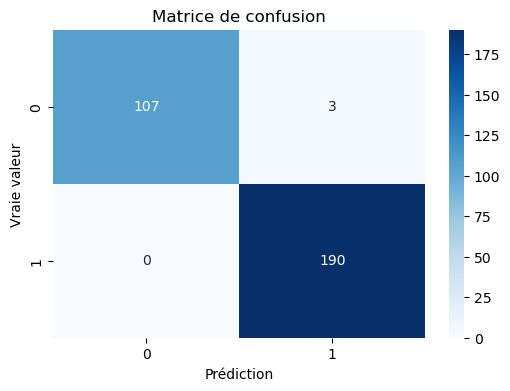

In [202]:
# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

La matrice de confusion montre les résultats de classification du modèle pour chaque classe. Le modèle a prédit correctement 107 vrais billets et 190 faux billets. Il y a eu 3 faux positifs (des billets prédits comme vrais mais qui sont faux) et aucun faux négatif (pas de billets faux prédits comme vrais).

## Corube ROC

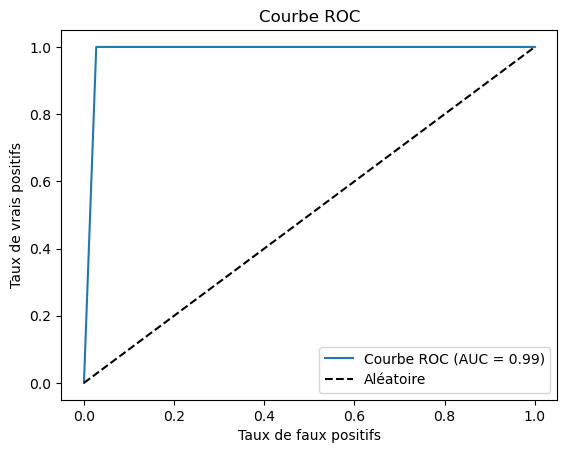

In [174]:
# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Kmeans

In [175]:
# Séparer les caractéristiques (X) de la variable cible (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Créer et entraîner le modèle K-means avec 2 clusters pour identifier les deux types de billets (vrai/faux)
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_train)

# Obtenir les centroïdes des clusters
centroids = kmeans_model.cluster_centers_

# Faire des prédictions sur l'ensemble de test en utilisant le modèle K-means
kmeans_predictions = kmeans_model.predict(X_test)

# Calculer la précision du modèle K-means
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)

# Afficher la précision du modèle K-means
print("Précision du K-means : {:.2f}%".format(kmeans_accuracy * 100))

Précision du K-means : 2.00%


c:\Users\antoi\anaconda3\Nouveau dossier\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Le résultat affiché est "Précision du K-means : 2.00%". Cela signifie que le modèle K-means a une précision de 2,00%, ce qui est relativement faible. Une précision aussi faible indique que le modèle ne parvient pas à bien identifier les deux types de billets (vrai/faux) dans votre ensemble de données.

# Test avec le fichier type présentation

In [181]:
# Import fichier csv
dft = pd.read_csv('fichiertype.csv')

In [182]:
# suppression de la colonne inutile pour la prédiction
dft = dft.drop('id', axis=1)

In [183]:
# Vérification du fichier pour savoir si il contient des null
dft.isnull().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [184]:
# Statistiques descriptives
stats = dft.describe().round(3)
print(stats)

       diagonal  height_left  height_right  margin_low  margin_up   length
count     5.000        5.000         5.000       5.000      5.000    5.000
mean    171.954      104.188       103.972       4.882      3.238  112.322
std       0.327        0.396         0.393       0.837      0.143    0.897
min     171.650      103.630       103.540       3.770      3.030  111.420
25%     171.760      104.010       103.560       4.440      3.160  111.570
50%     171.870      104.170       104.130       4.990      3.300  112.090
75%     172.000      104.550       104.290       5.210      3.310  113.200
max     172.490      104.580       104.340       6.000      3.390  113.330


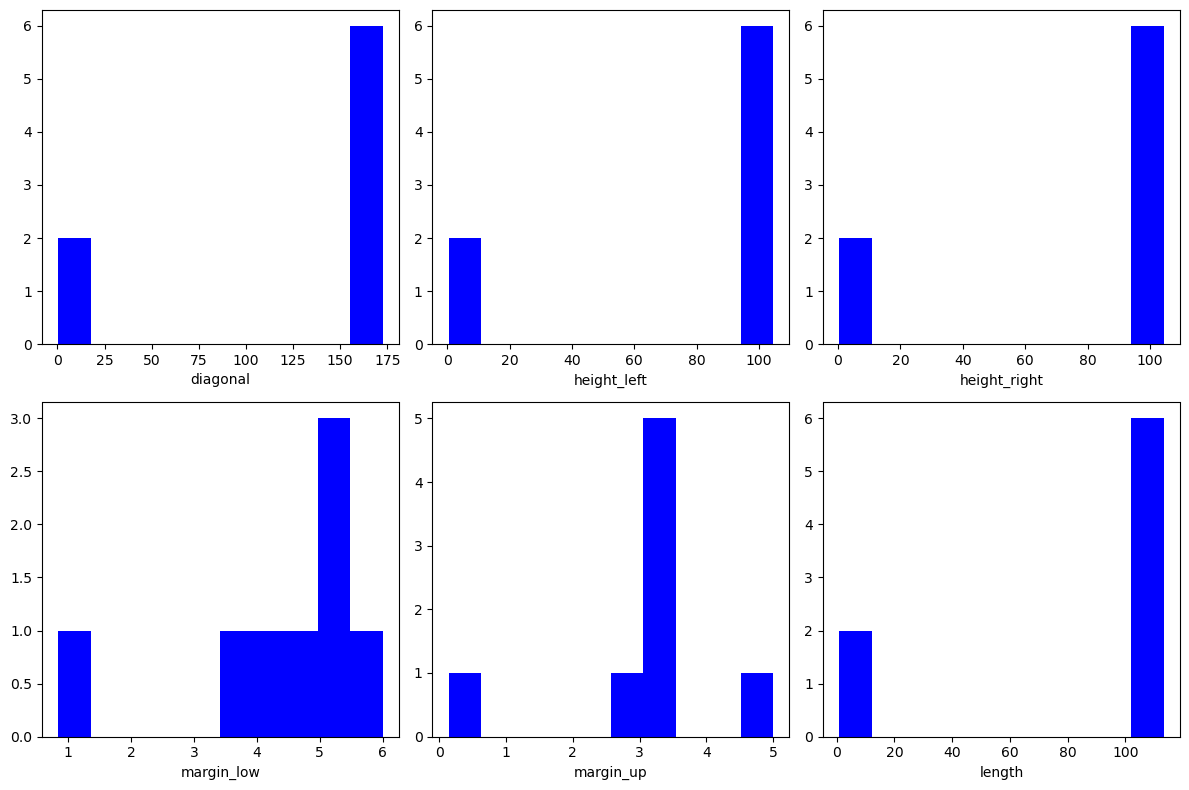

In [185]:
# Sélectionner les colonnes de dimensions
dimensions = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
dimensions_data = stats[dimensions]

# Créer un subplot de 2x3 pour les histogrammes des dimensions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Parcourir les dimensions et créer les histogrammes correspondants
for i, dim in enumerate(dimensions):
    ax = axes[i // 3, i % 3]

    # Tracer l'histogramme en bleu pour chaque dimension
    ax.hist(dimensions_data[dim], bins=10, color='blue')

    ax.set_xlabel(dim)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

In [186]:
y_pred = model.predict(dft)

#Résultat de la prédiction
dft['is_genuine'] = y_pred
print(dft[['is_genuine']])

   is_genuine
0       False
1       False
2       False
3        True
4        True


# Tensorflow

In [187]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Charger les données à partir du fichier CSV
data = pd.read_csv('billets.csv', delimiter=';')

In [188]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [189]:
X = data.drop('is_genuine', axis=1)

In [190]:

# Séparer les caractéristiques (X) et les étiquettes (y)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [191]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Définition du modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [193]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [194]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20


38/38 [==============================] - 1s 978us/step - loss: nan - accuracy: 0.3275
Epoch 2/20
38/38 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3250
Epoch 3/20
38/38 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3250
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3250
Epoch 5/20
38/38 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3250
Epoch 6/20
38/38 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3250
Epoch 7/20
38/38 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3250
Epoch 8/20
38/38 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3250
Epoch 9/20
38/38 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3250
Epoch 10/20
38/38 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3250
Epoch 11/20
38/38 [==============================] - 0s 1m

In [195]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

10/10 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3667
Test Loss: nan
Test Accuracy: 0.36666667461395264


In [196]:
# Prédiction sur de nouvelles données
new_data = np.array([[171.81, 104.86, 104.95, 4.52, 2.89, 112.83], [171.46, 103.36, 103.66, 3.77, 2.99, 113.09]])
predictions = model.predict(new_data)
print('Predictions:', predictions)


1/1 [==============================] - 0s 106ms/step
Predictions: [[nan]
 [nan]]
